In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pickle

import matplotlib

matplotlib.style.use('ggplot')

%matplotlib inline

In [3]:
# diretorios de trabalho
BASE_DIR = '/home/tparente/danilo/mestrado/artigo_tg/'
DATA_DIR = BASE_DIR + 'dados_bndo/'

## Dados de Verão

In [4]:
# verificar a duracao de cada serie temporal da Ilha Guaiba
print('Series de Nivel do Mar para Terminal da Ilha Guaiba')

lfiles = glob.glob(DATA_DIR+'1997/*')
lfiles.sort()

# ler, inicialmente, os dois primeiros arquivos para ampliar uma série
files = lfiles[:2]

Series de Nivel do Mar para Terminal da Ilha Guaiba


In [5]:
file1 = pd.read_csv(files[0], skiprows=11, delimiter=';', names=['nivel', 'x'])
file1.drop(file1.columns[len(file1.columns)-1], axis=1, inplace=True)

file2 = pd.read_csv(files[1], skiprows=11, delimiter=';', names=['nivel', 'x'])
file2.drop(file2.columns[len(file2.columns)-1], axis=1, inplace=True)

In [29]:
dtRange = pd.date_range(start=file1.index[0], end=file1.index[-1], freq='H')

df1 = pd.DataFrame({'nivel do mar [m]': file1['nivel'].values/100.}, index=dtRange)

df1.head()


(1080, 1)

In [28]:
dtRange = pd.date_range(start="1997-02-02 00:00", end="1997-03-05 23:00", freq='H')

df2 = pd.DataFrame({'nivel do mar [m]': file2['nivel'].values/100.}, index=dtRange)

df2.head()

,nivel do mar [m]
1997-02-02 00:00:00,1.80
1997-02-02 01:00:00,1.80
1997-02-02 02:00:00,1.75
1997-02-02 03:00:00,1.67
1997-02-02 04:00:00,1.40


### agrupando as duas séries

In [22]:
# dtRange = pd.date_range(start='1996-12-18 00:00', end='1997-03-05 23:00', freq='H')

dtRange = pd.date_range(start='1997-02-01 00:00', end='1997-02-01 23:00', freq='H')

dt3 = pd.DataFrame({'nivel do mar [m]': np.ones(dtRange.shape[0])*np.nan}, index=dtRange)


In [9]:
# concatenando

df = pd.concat([df1, dt3, df2])

#### controle de qualidade

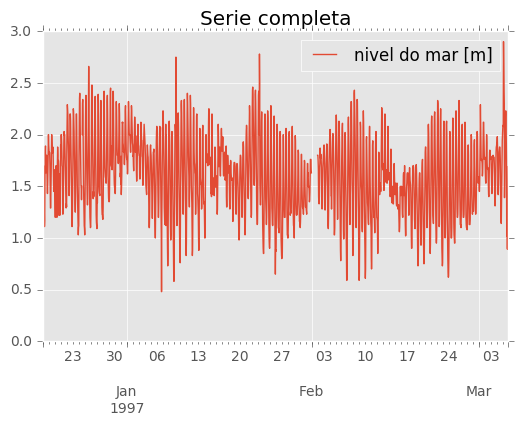

In [10]:
# remover qualquer valor acima do intervalo de 3 desvios padrões
df[df['nivel do mar [m]'] > 10] = np.nan

df.plot(title='Serie completa')

In [21]:
df.head()

,nivel do mar [m]
1996-12-18 00:00:00,1.60
1996-12-18 01:00:00,1.70
1996-12-18 02:00:00,1.69
1996-12-18 03:00:00,1.50
1996-12-18 04:00:00,1.30


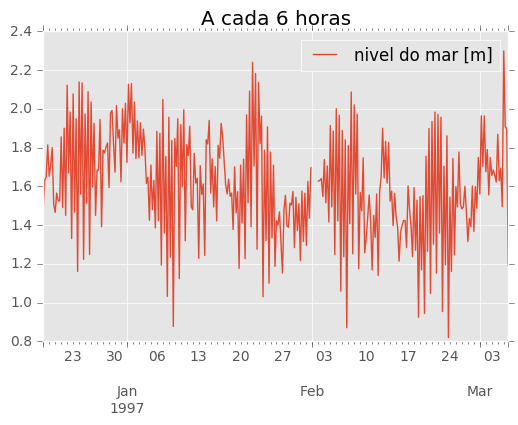

In [12]:
df.resample('6H').mean().plot(title='A cada 6 horas')

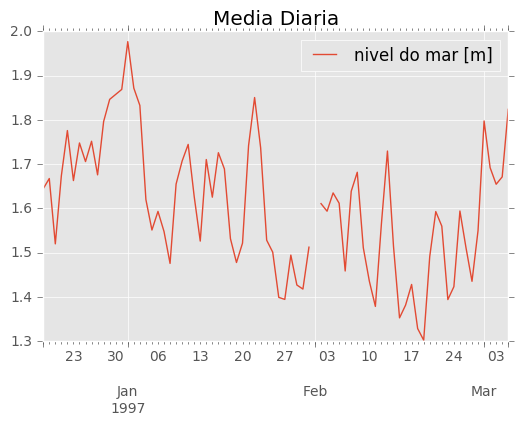

In [13]:
df.resample('D').mean().plot(title='Media Diaria')

### salvar o dado tratado para posterior validação com a saída do modelo

In [79]:
pickle.dump(df,open(BASE_DIR+'rotinas/terminalGuaiba_Verao.pkl', 'w'))

## Dados de Inverno

In [38]:
lfiles = glob.glob(DATA_DIR+'50165002732705199031121990ALT.*')
lfiles.sort()

# ler, inicialmente, os dois primeiros arquivos para ampliar uma série
files = lfiles[0]

file1 = pd.read_csv(files, skiprows=11, delimiter=';', names=['nivel', 'x'])
file1.drop(file1.columns[len(file1.columns)-1], axis=1, inplace=True)


dtRange = pd.date_range(start="1990-05-27 00:00", end="1990-12-31 23:00", freq='H')

df = pd.DataFrame({'nivel do mar [m]': file1['nivel'].values/100.}, index=dtRange)

df.tail()

,nivel do mar [m]
1990-12-31 19:00:00,1.50
1990-12-31 20:00:00,1.30
1990-12-31 21:00:00,1.10
1990-12-31 22:00:00,0.83
1990-12-31 23:00:00,0.70


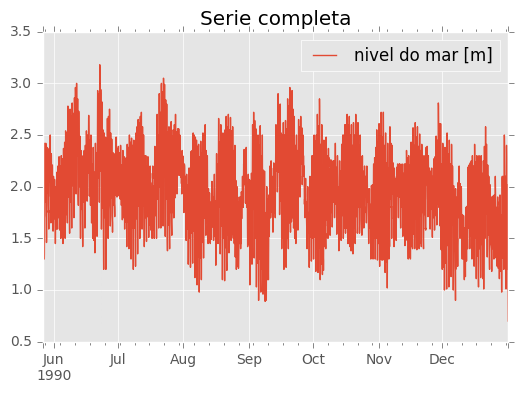

In [40]:
# remover qualquer valor acima do intervalo de 3 desvios padrões
df[df['nivel do mar [m]'] > 10] = np.nan

df.plot(title='Serie completa')

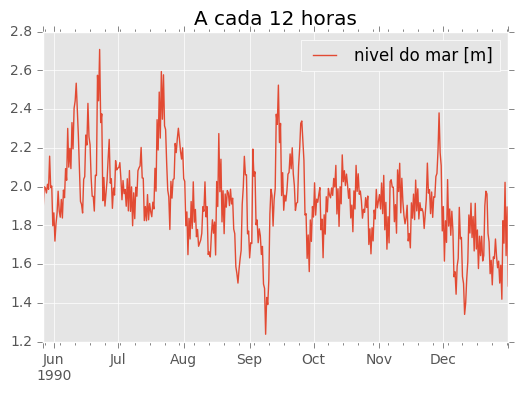

In [44]:
df.resample('12H').mean().plot(title='A cada 12 horas')

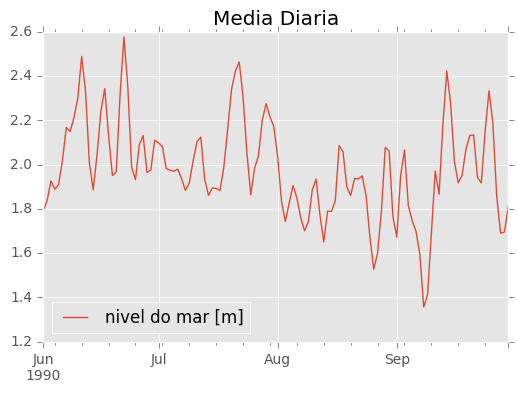

In [48]:
df['06-1990':'09-1990'].resample('D').mean().plot(title='Media Diaria')

### salvar os dados

In [49]:

pickle.dump(df,open(BASE_DIR+'rotinas/terminalGuaiba_Inverno.pkl', 'w'))